In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
dfa = pd.read_csv('nba_players.csv')
dfa

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [3]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [4]:
dfa.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [6]:
# Mengecek semua kolom dan total unik nya
for i in dfa.columns:
    print(i)
    display(dfa[i].value_counts().sort_index())

Unnamed: 0


0        1
1        1
2        1
3        1
4        1
        ..
11140    1
11141    1
11142    1
11143    1
11144    1
Name: Unnamed: 0, Length: 11145, dtype: int64

Unnamed: 0.1


0        1
1        1
2        1
3        1
4        1
        ..
11140    1
11141    1
11142    1
11143    1
11144    1
Name: Unnamed: 0.1, Length: 11145, dtype: int64

player_name


A.C. Green             5
A.J. Bramlett          1
A.J. Guyton            3
AJ Hammons             1
AJ Price               6
                      ..
Zion Williamson        1
Zoran Dragic           1
Zoran Planinic         3
Zydrunas Ilgauskas    13
Zylan Cheatham         1
Name: player_name, Length: 2235, dtype: int64

team_abbreviation


ATL    383
BKN    140
BOS    367
CHA    254
CHH     89
CHI    369
CLE    390
DAL    384
DEN    372
DET    358
GSW    376
HOU    378
IND    371
LAC    389
LAL    371
MEM    315
MIA    387
MIL    371
MIN    366
NJN    257
NOH    143
NOK     32
NOP    122
NYK    371
OKC    195
ORL    368
PHI    380
PHX    362
POR    367
SAC    358
SAS    377
SEA    182
TOR    390
UTA    360
VAN     72
WAS    379
Name: team_abbreviation, dtype: int64

age


18.0       3
19.0      67
20.0     246
21.0     425
22.0     678
23.0    1039
24.0    1143
25.0    1025
26.0     933
27.0     891
28.0     774
29.0     718
30.0     654
31.0     581
32.0     502
33.0     424
34.0     329
35.0     232
36.0     180
37.0     126
38.0      83
39.0      51
40.0      27
41.0       7
42.0       3
43.0       3
44.0       1
Name: age, dtype: int64

player_height


160.02       5
165.10      13
167.64       1
175.26      24
177.80      52
180.34     104
182.88     254
183.00       1
185.42     440
187.96     496
190.50     755
193.04     619
195.58     807
196.00       5
198.12     918
200.66    1093
201.00      13
203.00       1
203.20    1061
205.74    1369
208.28    1133
210.82     958
213.36     673
215.90     193
218.44      82
220.98      43
223.52       7
226.06       6
228.60      16
231.14       3
Name: player_height, dtype: int64

player_weight


60.327736     13
61.688512      1
63.956472      4
65.770840      1
68.038800      2
              ..
149.685360     1
151.953320     1
154.221280     1
155.582056     1
163.293120     1
Name: player_weight, Length: 157, dtype: int64

college


                        6
Alabama               109
Alabama A&M             1
Alabama Huntsville      2
Alabama-Birmingham      7
                     ... 
Wright State           11
Wyoming                35
Xavier                 84
Yale                    8
Yonsei (KOR)            2
Name: college, Length: 316, dtype: int64

country


Angola             1
Argentina         60
Australia         74
Austria            4
Bahamas            6
                  ..
Ukraine           39
United Kingdom    19
Uruguay            2
Venezuela          9
Yugoslavia        11
Name: country, Length: 76, dtype: int64

draft_year


1963            1
1976            1
1978            1
1979            3
1980            3
1981           16
1982           11
1983           22
1984           49
1985           86
1986           52
1987           90
1988          127
1989          123
1990          162
1991          149
1992          232
1993          210
1994          273
1995          328
1996          406
1997          345
1998          454
1999          366
2000          364
2001          403
2002          325
2003          430
2004          362
2005          420
2006          315
2007          334
2008          381
2009          357
2010          281
2011          318
2012          279
2013          248
2014          223
2015          186
2016          166
2017          145
2018          103
2019           53
Undrafted    1942
Name: draft_year, dtype: int64

draft_round


1            6513
2            2629
3              20
4              12
6               5
7               5
8               2
Undrafted    1959
Name: draft_round, dtype: int64

draft_number


1             320
10            278
11            232
12            210
120             1
             ... 
8             258
82              1
87              1
9             282
Undrafted    1959
Name: draft_number, Length: 75, dtype: int64

gp


1     102
2     136
3     130
4      98
5     119
     ... 
81    410
82    719
83     10
84      1
85      3
Name: gp, Length: 85, dtype: int64

pts


0.0     136
0.1       3
0.2       7
0.3      21
0.4      18
       ... 
32.1      1
33.0      1
34.5      1
35.4      1
36.1      1
Name: pts, Length: 308, dtype: int64

reb


0.0     118
0.1      10
0.2      41
0.3      95
0.4      63
       ... 
15.4      1
15.6      1
16.0      1
16.1      1
16.3      1
Name: reb, Length: 154, dtype: int64

ast


0.0     374
0.1     279
0.2     401
0.3     592
0.4     549
       ... 
11.2      2
11.4      2
11.5      1
11.6      2
11.7      2
Name: ast, Length: 114, dtype: int64

net_rating


-200.0    1
-158.3    1
-150.0    1
-147.5    1
-144.9    1
         ..
 114.3    1
 120.0    1
 150.0    1
 250.0    1
 300.0    1
Name: net_rating, Length: 707, dtype: int64

oreb_pct


0.000    425
0.002      2
0.003      9
0.004     11
0.005     27
        ... 
0.375      1
0.400      2
0.500      3
0.600      1
1.000      1
Name: oreb_pct, Length: 216, dtype: int64

dreb_pct


0.000    162
0.014      2
0.015      1
0.016      1
0.017      1
        ... 
0.500     11
0.571      1
0.600      1
0.714      1
1.000      2
Name: dreb_pct, Length: 351, dtype: int64

usg_pct


0.000    33
0.019     1
0.020     1
0.025     1
0.030     1
         ..
0.500     3
0.571     1
0.595     1
0.750     1
1.000     1
Name: usg_pct, Length: 341, dtype: int64

ts_pct


0.000    136
0.046      1
0.051      1
0.056      2
0.091      1
        ... 
1.025      1
1.042      1
1.050      1
1.064      7
1.500      3
Name: ts_pct, Length: 529, dtype: int64

ast_pct


0.000    359
0.004      1
0.005      2
0.007      4
0.008      5
        ... 
0.615      1
0.636      1
0.667      4
0.750      1
1.000      3
Name: ast_pct, Length: 479, dtype: int64

season


1996-97    441
1997-98    439
1998-99    439
1999-00    438
2000-01    441
2001-02    440
2002-03    428
2003-04    442
2004-05    464
2005-06    458
2006-07    458
2007-08    451
2008-09    445
2009-10    442
2010-11    452
2011-12    478
2012-13    469
2013-14    482
2014-15    492
2015-16    476
2016-17    486
2017-18    540
2018-19    530
2019-20    514
Name: season, dtype: int64

potential_player


0    10690
1      455
Name: potential_player, dtype: int64

## 1. Data cleansing & preprocessing

In [7]:
# Menghapus kolom yang tidak penting
dfb = dfa.copy(deep=True)
dfb.drop(['Unnamed: 0', 'Unnamed: 0.1', 'draft_year', 'draft_round', 'draft_number'], axis=1, inplace=True)
dfb.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


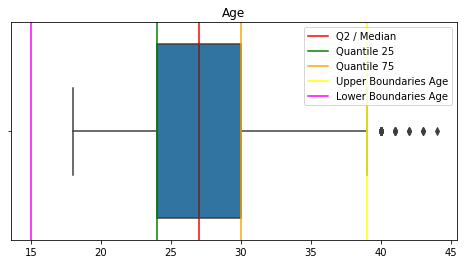

Upper Boundaries Age: 39.0
Lower Boundaries Age: 15.0


In [9]:
# Yang menjadi perhatian outliers hanya age, karena feature yang lain adalah faktor skill permainan pemain.

plt.figure(figsize=(8,4))
plt.title('Age')
data_a = dfb['age'].values.tolist()
sns.boxplot(x=data_a)

iqr_a = np.quantile(data_a, 0.75) - np.quantile(data_a, 0.25)
upper_boundaries_a = np.quantile(data_a, 0.75) + (1.5*iqr_a)
lower_boundaries_a = np.quantile(data_a, 0.25) - (1.5*iqr_a)

plt.axvline(np.median(data_a), color='red', label='Q2 / Median')
plt.axvline(np.quantile(data_a, 0.25), color='green', label='Quantile 25')
plt.axvline(np.quantile(data_a, 0.75), color='orange', label='Quantile 75')
plt.axvline(upper_boundaries_a, color='yellow', label='Upper Boundaries Age')
plt.axvline(lower_boundaries_a, color='magenta', label='Lower Boundaries Age')
plt.legend()

plt.show()

print('Upper Boundaries Age:', upper_boundaries_a)
print('Lower Boundaries Age:', lower_boundaries_a)

In [21]:
df_out = dfb[(dfb['age'] > upper_boundaries_a) | (dfb['age'] < lower_boundaries_a)]
len(df_out)
df_out.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
203,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,12,0.3,1.1,0.3,2.6,0.068,0.103,0.025,0.400,0.046,1996-97,0
270,Robert Parish,CHI,43.0,215.90,110.676448,Centenary (LA),USA,43,3.7,2.1,0.5,14.9,0.114,0.130,0.201,0.514,0.082,1996-97,0
385,John Long,TOR,40.0,195.58,90.718400,Detroit Mercy,USA,32,4.0,1.3,0.7,-9.8,0.017,0.101,0.182,0.499,0.104,1996-97,0
730,Charles Jones,HOU,41.0,205.74,97.522280,Albany State (GA),USA,24,0.6,1.0,0.2,-6.2,0.098,0.111,0.049,0.689,0.055,1997-98,0
870,Herb Williams,NYK,40.0,208.28,109.769264,Ohio State,USA,27,1.4,1.1,0.1,-8.0,0.042,0.160,0.143,0.398,0.041,1997-98,0


In [20]:
# Menghapus usia yang tidak normal
dfc = dfb[(dfb['age'] <= upper_boundaries_a) & (dfb['age'] >= lower_boundaries_a)]
# len(dfc)
dfc.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [19]:
len(dfb)

11145

In [14]:
print('Data yang hilang sebanyak:', round(len(df_out)/len(dfb)*100 ,2), '%')

Data yang hilang sebanyak: 0.37 %


In [22]:
# Mendeskripsikan semua data per features (kolom)
list_item = []
for column in dfc.columns:
    list_item.append([column, dfc[column].dtype, dfc[column].isnull().sum(),
                     round(dfc[column].isnull().sum()/len(dfc),2), dfc[column].nunique(), 
                      dfc[column].unique()[:4]])
desc_dfc = pd.DataFrame(data=list_item, columns='features dtype null null% nunique unique_sample'.split())
desc_dfc

,features,dtype,null,null%,nunique,unique_sample
0,player_name,object,0,0.0,2232,"[Dennis Rodman, Dwayne Schintzius, Earl Cureto..."
1,team_abbreviation,object,0,0.0,36,"[CHI, LAC, TOR, DAL]"
2,age,float64,0,0.0,22,"[36.0, 28.0, 39.0, 24.0]"
3,player_height,float64,0,0.0,30,"[198.12, 215.9, 205.74, 203.2]"
4,player_weight,float64,0,0.0,157,"[99.79024, 117.93392, 95.25432, 100.697424]"
5,college,object,0,0.0,315,"[Southeastern Oklahoma State, Florida, Detroit..."
6,country,object,0,0.0,76,"[USA, Congo, Nigeria, Lithuania]"
7,gp,int64,0,0.0,85,"[55, 15, 9, 64]"
8,pts,float64,0,0.0,308,"[5.7, 2.3, 0.8, 3.7]"
9,reb,float64,0,0.0,154,"[16.1, 1.5, 1.0, 2.3]"


### Feature Selection

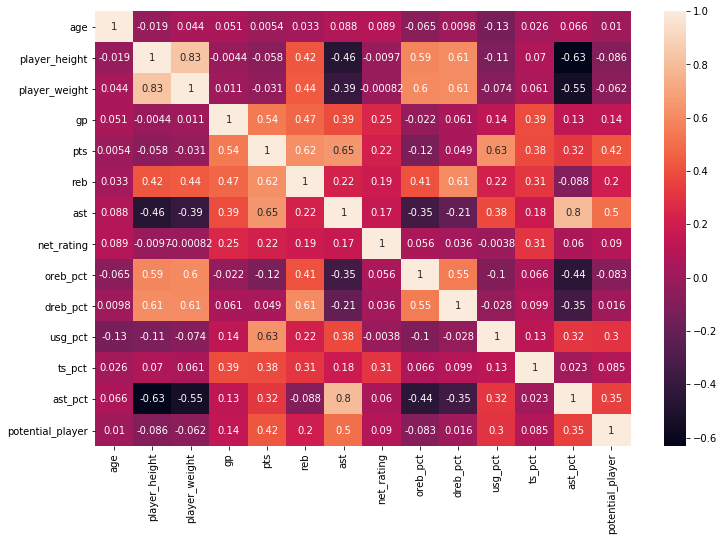

In [23]:
# Correlation
plt.figure(figsize=(12,8))
sns.heatmap(dfc.corr(), annot=True)
plt.show()

In [25]:
dfc.corr()[['potential_player']].sort_values('potential_player', ascending=False).iloc[1:].rename(columns={'potential_player': 'Pearson_Coef'})

,Pearson_Coef
ast,0.504426
pts,0.421059
ast_pct,0.345324
usg_pct,0.303256
reb,0.201604
gp,0.140938
net_rating,0.090098
ts_pct,0.085102
dreb_pct,0.015794
age,0.010428


In [26]:
# Correlation Ratio
def correlation_ratio(categories, measurements):
    
    def convert(data, to):
        converted = None
        if to == 'array':
            if isinstance(data, np.ndarray):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values
            elif isinstance(data, list):
                converted = np.array(data)
            elif isinstance(data, pd.DataFrame):
                converted = data.as_matrix()
        elif to == 'list':
            if isinstance(data, list):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values.tolist()
            elif isinstance(data, np.ndarray):
                converted = data.tolist()
        elif to == 'dataframe':
            if isinstance(data, pd.DataFrame):
                converted = data
            elif isinstance(data, np.ndarray):
                converted = pd.DataFrame(data)
        else:
            raise ValueError("Unknown data conversion: {}".format(to))
        if converted is None:
            raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
        else:
            return converted
        
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [27]:
obj_col = dfc.select_dtypes(include=['object']).columns
obj_col

Index(['player_name', 'team_abbreviation', 'college', 'country', 'season'], dtype='object')

In [28]:
corr = {}
for col in obj_col:
    corr[col] = correlation_ratio(dfc[col], dfc['potential_player'])  # potential_player as continous variable
corr_df = pd.DataFrame(corr.values(), index=corr.keys(), columns=['correlation_ratio_score'])
corr_df.sort_values('correlation_ratio_score', ascending=False)

,correlation_ratio_score
player_name,0.502985
college,0.061453
team_abbreviation,0.008773
country,0.006635
season,0.002903


In [30]:
print(dfc.columns.tolist())

['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'potential_player']


In [31]:
# Dari Feature Selection dipilih kolom2 di dataframe df_fix. Dataframe ini akan digunakan untuk machine learning.
# karena korelasi yang rendah dan juga secara domain knowledge nama, id, college, dan negara bukan fitur utama dalam menilai skill pemain.
df_fix = dfc.drop(obj_col, axis=1)
df_fix

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,0
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,0
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,0
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,0


In [33]:
X = df_fix.drop('potential_player', axis=1)
y = df_fix['potential_player']

display(X.head())
display(y.head())

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


0    0
1    0
2    0
3    0
4    0
Name: potential_player, dtype: int64

In [35]:
# karena nilai age dan nilai seperti oreb_pct, dreb_pct, usg_pct, dll berbanding jauh, maka perlu di skala dahulu.
stdscaler = StandardScaler()
stdscaler.fit(X)
scaled_features = stdscaler.transform(X)
scaled_features

array([[ 2.07811436, -0.29165921, -0.06627479, ..., -1.61698069,
        -0.29393434, -0.19087484],
       [ 0.2061572 ,  1.64388131,  1.3765075 , ..., -0.20199112,
        -0.78907208, -0.87547312],
       [ 2.78009829,  0.53785816, -0.42697037, ..., -1.5603811 ,
        -1.33473407,  0.17775501],
       ...,
       [ 0.2061572 ,  1.36737552,  1.3765075 , ..., -1.23965013,
         1.3329468 , -0.58056925],
       [-0.02783744,  0.81436395,  0.33049034, ..., -1.12645097,
         0.13046943, -0.79121487],
       [-0.49582673, -0.84467079, -1.14836151, ..., -0.69252084,
         1.56535839, -0.44364959]])

In [36]:
df_stdscaled = pd.DataFrame(scaled_features, columns=X.columns)
df_stdscaled

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.078114,-0.291659,-0.066275,0.118245,-0.410587,5.021372,0.725037,1.501031,2.970828,2.868271,-1.616981,-0.293934,-0.190875
1,0.206157,1.643881,1.376508,-1.477668,-0.983173,-0.826262,-0.839898,1.188612,0.510115,0.146893,-0.201991,-0.789072,-0.875473
2,2.780098,0.537858,-0.426970,-1.717055,-1.235785,-1.026524,-0.784008,0.004711,1.125293,-0.628383,-1.560381,-1.334734,0.177755
3,-0.729821,0.261352,0.005864,0.477326,-0.747402,-0.505844,-0.672227,-0.537911,0.099996,0.115249,-0.352923,-1.102322,-0.570037
4,1.610125,0.537858,0.655116,-0.998894,-0.966332,-0.465792,-0.895789,-0.743450,1.216430,0.589908,-1.107584,1.039906,-0.959731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099,0.206157,0.814364,0.655116,0.437428,0.162000,0.735777,-0.392774,0.555554,0.008858,-0.027148,-0.937786,0.979277,-0.706957
11100,-0.963816,-0.568165,-0.246623,-1.477668,-1.168422,-1.306890,-0.951680,-0.019954,-0.856949,-1.324550,-0.409523,-0.283829,-1.033457
11101,0.206157,1.367376,1.376508,-0.121142,-0.343223,0.615620,-0.392774,0.637769,-0.606320,1.191143,-1.239650,1.332947,-0.580569
11102,-0.027837,0.814364,0.330490,-1.278179,-1.016855,-0.225478,-0.784008,-1.170970,0.669605,1.507582,-1.126451,0.130469,-0.791215


## 2. Data visualisasi (Insight)

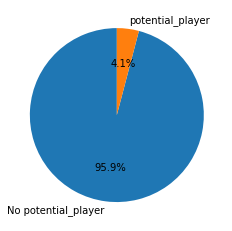

[10650, 454]

In [37]:
sizes = [len(dfc[dfc['potential_player']==False]), len(dfc[dfc['potential_player']==True])]
labels = ['No potential_player', 'potential_player']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()
display(sizes)

# Chart berikut menampilkan nilai rasio antara pemain berpotensi dan tidak yang terdapat di dalam data

In [39]:
df_obj_p = dfc.select_dtypes(include='object')
df_obj_p['potential_player'] = dfc['potential_player']
df_obj_p.head()

C:\Users\Asyraf\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,player_name,team_abbreviation,college,country,season,potential_player
0,Dennis Rodman,CHI,Southeastern Oklahoma State,USA,1996-97,0
1,Dwayne Schintzius,LAC,Florida,USA,1996-97,0
2,Earl Cureton,TOR,Detroit Mercy,USA,1996-97,0
3,Ed O'Bannon,DAL,UCLA,USA,1996-97,0
4,Ed Pinckney,MIA,Villanova,USA,1996-97,0


In [40]:
# Membuat group by potential_player
by_pp = dfc.groupby('potential_player')
for i in df_obj_p.columns.tolist():
    display(by_pp[i].value_counts())

potential_player  player_name    
0                 Dirk Nowitzki      19
                  Jamal Crawford     19
                  Tyson Chandler     19
                  Derek Fisher       18
                  Jermaine O'Neal    18
                                     ..
1                 Stephen Jackson     1
                  Steve Nash          1
                  T.J. Ford           1
                  Terry Rozier        1
                  Trae Young          1
Name: player_name, Length: 2360, dtype: int64

potential_player  team_abbreviation
0                 DAL                  377
                  CLE                  376
                  LAC                  376
                  TOR                  375
                  ATL                  367
                                      ... 
1                 DAL                    4
                  MEM                    4
                  NYK                    3
                  BKN                    2
                  NOK                    2
Name: team_abbreviation, Length: 71, dtype: int64

potential_player  college        
0                 None               1587
                  Kentucky            324
                  Duke                322
                  North Carolina      303
                  UCLA                252
                                     ... 
1                 San Diego State       1
                  Santa Clara           1
                  Tennessee State       1
                  Texas A&M             1
                  Virginia              1
Name: college, Length: 383, dtype: int64

potential_player  country   
0                 USA           8979
                  France         146
                  Canada         137
                  Brazil          78
                  Spain           71
                                ... 
1                 Turkey           2
                  Lithuania        1
                  Montenegro       1
                  Russia           1
                  Venezuela        1
Name: country, Length: 92, dtype: int64

potential_player  season 
0                 2017-18    508
                  2018-19    496
                  2019-20    481
                  2014-15    473
                  2011-12    467
                  2016-17    461
                  2013-14    460
                  2012-13    450
                  2015-16    448
                  2004-05    446
                  2006-07    439
                  2010-11    438
                  2005-06    435
                  2007-08    434
                  2008-09    428
                  2009-10    428
                  1999-00    427
                  1997-98    424
                  1998-99    423
                  1996-97    421
                  2000-01    420
                  2003-04    420
                  2001-02    418
                  2002-03    405
1                 2018-19     32
                  2019-20     32
                  2017-18     28
                  2015-16     25
                  2016-17     24
                 

potential_player  potential_player
0                 0                   10650
1                 1                     454
Name: potential_player, dtype: int64

In [50]:
by_pp['college'].value_counts(normalize=True)[0].head(10).index

Index(['None', 'Kentucky', 'Duke', 'North Carolina', 'UCLA', 'Kansas',
       'Arizona', 'Connecticut', 'Georgia Tech', 'Florida'],
      dtype='object', name='college')

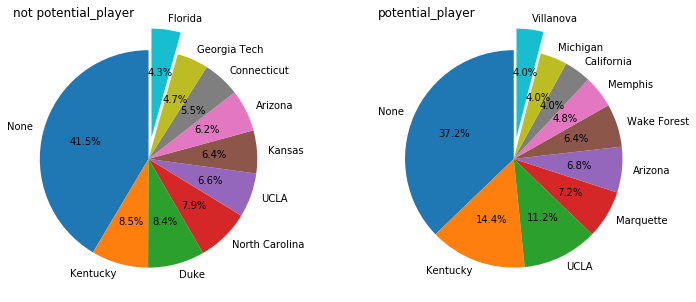

In [60]:
# Menggambarkan nilai rasio college pada potential_player dalam bentuk chart

labels_ppf = by_pp['college'].value_counts()[0].head(10).index.tolist()
labels_ppt = by_pp['college'].value_counts()[1].head(10).index.tolist()

plt.figure(figsize=(12,5))
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.subplot(121)
plt.title('not potential_player', loc='left')
plt.pie(by_pp['college'].value_counts()[0].head(10), labels=labels_ppf, explode=explode, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('potential_player', loc='left')
plt.pie(by_pp['college'].value_counts()[1].head(10), labels=labels_ppt, explode=explode, autopct='%1.1f%%', startangle=90)

plt.show()

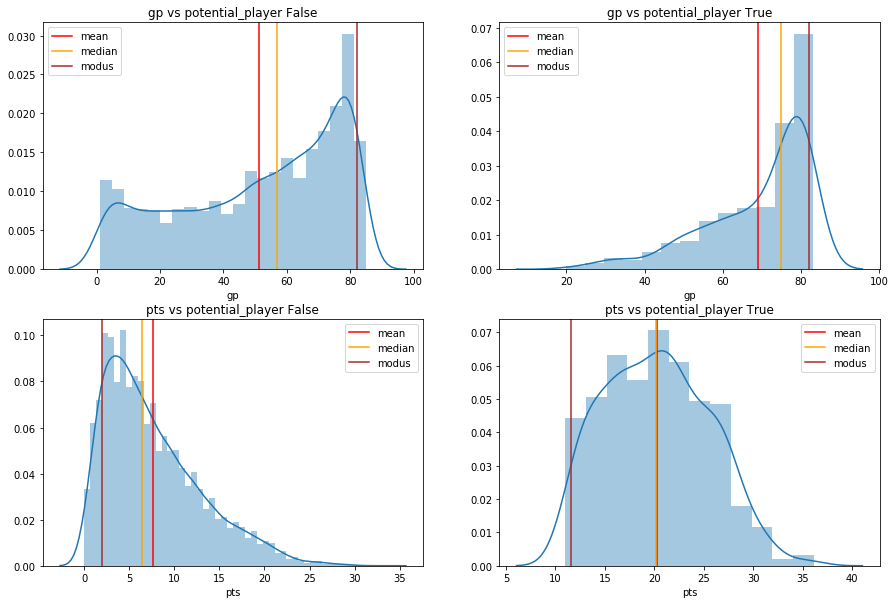

In [61]:
# Membandingkan antara games played dan points berdasarkan potential_player

plt.figure(figsize=(15,10))

df_pp_false = dfc[dfc['potential_player']==0]
df_pp_true = dfc[dfc['potential_player']==1]

plt.subplot(221)
plt.title('gp vs potential_player False')
sns.distplot(df_pp_false['gp'])
plt.axvline(df_pp_false['gp'].mean(), color='r', label='mean')
plt.axvline(df_pp_false['gp'].median(), color='orange', label='median')
plt.axvline(df_pp_false['gp'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(222)
plt.title('gp vs potential_player True')
sns.distplot(df_pp_true['gp'])
plt.axvline(df_pp_true['gp'].mean(), color='r', label='mean')
plt.axvline(df_pp_true['gp'].median(), color='orange', label='median')
plt.axvline(df_pp_true['gp'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(223)
plt.title('pts vs potential_player False')
sns.distplot(df_pp_false['pts'])
plt.axvline(df_pp_false['pts'].mean(), color='r', label='mean')
plt.axvline(df_pp_false['pts'].median(), color='orange', label='median')
plt.axvline(df_pp_false['pts'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(224)
plt.title('pts vs potential_player True')
sns.distplot(df_pp_true['pts'])
plt.axvline(df_pp_true['pts'].mean(), color='r', label='mean')
plt.axvline(df_pp_true['pts'].median(), color='orange', label='median')
plt.axvline(df_pp_true['pts'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

In [196]:
dfc.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct',
       'season', 'potential_player'],
      dtype='object')

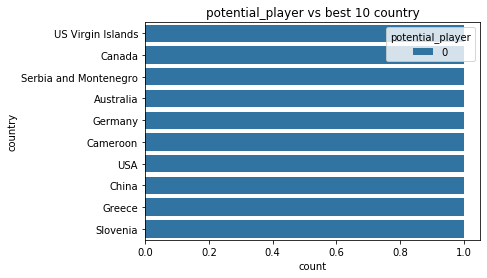

In [212]:
best_10_ctr = dfc.sort_values('pts', ascending=False)['country'].unique()[:10].tolist()
best_10_ctr
idx_ctr = []
for i in best_10_ctr:
    idx_ctr.append(dfc[dfc['country'].str.contains(i)].head(1).index[0])
df_ctr = pd.DataFrame(dfc, index=idx_ctr).sort_values('pts', ascending=False)

plt.title('potential_player vs best 10 country')
sns.countplot(y=df_ctr['country'], hue=df_ctr['potential_player'])

# Menampikan 10 negara yang memiliki poin tertinggi. Ternyata negara yang memiliki poin tertingi tidak memiliki pemain berpotensi.

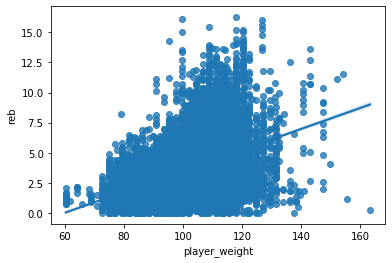

In [63]:
sns.regplot(x='player_weight', y='reb', data=dfc)
plt.show()

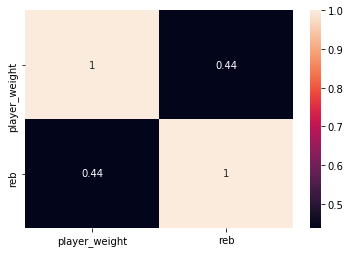

In [64]:
sns.heatmap(dfc[['player_weight', 'reb']].corr(), annot=True)

berat pemain (player_weight) dan rebound memilik korelasi positif meski hanya 0.44

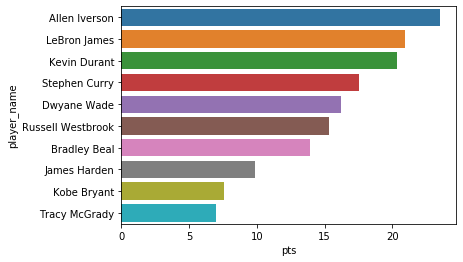

In [65]:
name_10 = dfc.sort_values('pts', ascending=False)['player_name'].unique()[:10].tolist()
idx_name = []
for i in name_10:
    idx_name.append(dfc[dfc['player_name'].str.contains(i)].head(1).index[0])
df_name = pd.DataFrame(dfc, index=idx_name).sort_values('pts', ascending=False)
sns.barplot(df_name['pts'], df_name['player_name'])

# Peraih poin terbanyak adalah Allen Iverson

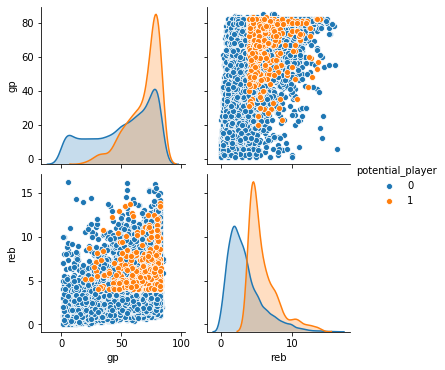

In [67]:
sns.pairplot(dfc[['gp', 'reb', 'potential_player']], hue='potential_player')

## 3. train_test_split

In [79]:
display(df_stdscaled)
display(y)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.078114,-0.291659,-0.066275,0.118245,-0.410587,5.021372,0.725037,1.501031,2.970828,2.868271,-1.616981,-0.293934,-0.190875
1,0.206157,1.643881,1.376508,-1.477668,-0.983173,-0.826262,-0.839898,1.188612,0.510115,0.146893,-0.201991,-0.789072,-0.875473
2,2.780098,0.537858,-0.426970,-1.717055,-1.235785,-1.026524,-0.784008,0.004711,1.125293,-0.628383,-1.560381,-1.334734,0.177755
3,-0.729821,0.261352,0.005864,0.477326,-0.747402,-0.505844,-0.672227,-0.537911,0.099996,0.115249,-0.352923,-1.102322,-0.570037
4,1.610125,0.537858,0.655116,-0.998894,-0.966332,-0.465792,-0.895789,-0.743450,1.216430,0.589908,-1.107584,1.039906,-0.959731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099,0.206157,0.814364,0.655116,0.437428,0.162000,0.735777,-0.392774,0.555554,0.008858,-0.027148,-0.937786,0.979277,-0.706957
11100,-0.963816,-0.568165,-0.246623,-1.477668,-1.168422,-1.306890,-0.951680,-0.019954,-0.856949,-1.324550,-0.409523,-0.283829,-1.033457
11101,0.206157,1.367376,1.376508,-0.121142,-0.343223,0.615620,-0.392774,0.637769,-0.606320,1.191143,-1.239650,1.332947,-0.580569
11102,-0.027837,0.814364,0.330490,-1.278179,-1.016855,-0.225478,-0.784008,-1.170970,0.669605,1.507582,-1.126451,0.130469,-0.791215


0        0
1        0
2        0
3        0
4        0
        ..
11140    0
11141    0
11142    0
11143    0
11144    0
Name: potential_player, Length: 11104, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_stdscaled, y, test_size=0.2, random_state = 1)
print(len(df_fix))
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

11104
8883 8883
2221 2221


In [81]:
8883 + 2221 

11104

## 4. Machine Learning

### A. Decision Tree Classifier
- Cara kerja Decision Tree Classifier:

**Decision Tree (Gini):**
1. Hitung gini dari setiap kolom terhadap target (dependent variable). Kolom dengan gini paling kecil di paling atas (sebagai root)
2. Lalu hitung lagi gini dari setiap kolom lainnya berdasarkan unique dari kolom di atasnya. Kolom dengan gini paling kecil lah yg dipilih.
3. Lalu hitung lagi gini dari setiap kolom lainnya berdasarkan unique dari kolom yg tadi dipilih. Kolom dengan gini paling kecil lah yg dipilih.
4. Begitu seterusnya.


**Decision Tree (Entropy):**
- Pola hitungannya kebalikan dari Gini.
- Jadi kolom dengan nilai Entropy paling besar yg dipilih duluan.

#### Decision Tree Classifier
Using the decision algorithm, we start at the tree root and split the data on the feature that results in the **largest information gain (IG)** (reduction in uncertainty towards the final decision).
In an iterative process, we can then repeat this splitting procedure at each child node until the **leaves are pure**. This means that the samples at each leaf node all belong to the same class.
In practice, we may set a **limit on the depth of the tree to prevent overfitting**. We compromise on purity here somewhat as the final leaves may still have some impurity.

#### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
4. All the tuples belong to the same attribute value.
5. There are no more remaining attributes.
6. There are no more instances.

In [86]:
# looking for best parameters

criterion_opsi = ['gini', 'entropy']
max_depth_opsi = [10, 15, 20, 25]
min_samples_split_opsi = [2,5,10,20]

params_dtr = {'criterion': criterion_opsi, 'max_depth': max_depth_opsi, 'min_samples_split': min_samples_split_opsi}
params_dtr

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 15, 20, 25],
 'min_samples_split': [2, 5, 10, 20]}

In [87]:
dtr = DecisionTreeClassifier(random_state=1)
random_dtr = RandomizedSearchCV(estimator=dtr, param_distributions = params_dtr, cv = 7, random_state=1)
random_dtr.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=1)

In [88]:
random_dtr.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=10,
                       random_state=1)

In [89]:
dtr = random_dtr.best_estimator_
dtr.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

array([[2129,    1],
       [   1,   90]], dtype=int64)

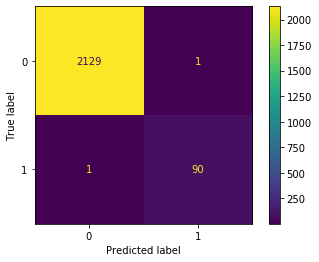

In [90]:
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_proba = dtr.predict_proba(X_test)

display(confusion_matrix(y_test, dtr_pred))

plot_confusion_matrix(dtr, X_test, y_test)

### B. Random Forest Classifier

#### How do Random Forests work?
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

Here the author firstly shows the Random Forest creation pseudocode:

1. Randomly select “K” features from total “m” features where k << m
2. Among the “K” features, calculate the node “d” using the best split point
3. Split the node into daughter nodes using the best split
4. Repeat the a to c steps until “l” number of nodes has been reached
5. Build forest by repeating steps a to d for “n” number times to create “n” number of trees

In [91]:
criterion_opsi = ['gini', 'entropy']
max_depth_opsi = [10, 15, 20, 25]
max_features_opsi = ['auto', 'sqrt', 'log2']
n_estimators_opsi = [50, 75, 100, 150]
max_samples_opsi = [None, 50, 100, 150]

params_rfc = {'criterion': criterion_opsi, 'max_depth': max_depth_opsi, 'max_features': max_features_opsi,
          'n_estimators': n_estimators_opsi, 'max_samples': max_samples_opsi}
params_rfc

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [50, 75, 100, 150],
 'max_samples': [None, 50, 100, 150]}

In [94]:
rfc = RandomForestClassifier(random_state=1)
random_rfc = RandomizedSearchCV(estimator=rfc, param_distributions = params_rfc, cv = 7, random_state=1)
random_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [None, 50, 100, 150],
                                        'n_estimators': [50, 75, 100, 150]},
                   random_state=1)

In [95]:
random_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       n_estimators=50, random_state=1)

In [96]:
rfc = random_rfc.best_estimator_
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

array([[2129,    1],
       [   1,   90]], dtype=int64)

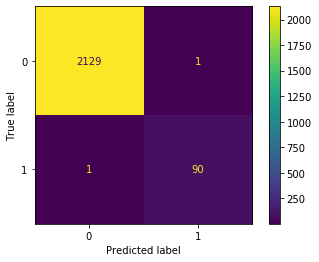

In [97]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

display(confusion_matrix(y_test, rfc_pred))

plot_confusion_matrix(rfc, X_test, y_test)

### C. Gradient Boosting Classifier

Gradient Boosting work like AdaBoost but include few differences. 

Gradient boosting involves three elements:

1. A loss function to be optimized.
2. A weak learner to make predictions.
3. An additive model to add weak learners to minimize the loss function.

Cara Perhitungan di dalam sistemnya:
1. Hitung Initial Prediction
2. Hitung Proba
3. Hitung Pseudo Residual
4. GBC akan membuat beberapa pohon secara random
5. Hitung output value
6. Hitung new prediction

In [98]:
criterion_opsi = ['friedman_mse', 'mse', 'mae']
loss_opsi = ['deviance', 'exponential']
max_depth_opsi = [3, 5, 10, 20]
max_features_opsi = ['auto', 'sqrt', 'log2']
n_estimators_opsi = [50, 75, 100, 150]

params_gbc = {'criterion': criterion_opsi, 'max_depth': max_depth_opsi, 'max_features': max_features_opsi,
          'n_estimators': n_estimators_opsi, 'loss': loss_opsi}
params_gbc

{'criterion': ['friedman_mse', 'mse', 'mae'],
 'max_depth': [3, 5, 10, 20],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [50, 75, 100, 150],
 'loss': ['deviance', 'exponential']}

In [101]:
gbc = GradientBoostingClassifier(random_state=1)
random_gbc = RandomizedSearchCV(estimator=gbc, param_distributions = params_gbc, cv = 7, random_state=1)
random_gbc.fit(X_train, y_train)
random_gbc.best_estimator_
gbc = random_gbc.best_estimator_
gbc.get_params()

array([[2129,    1],
       [   0,   91]], dtype=int64)

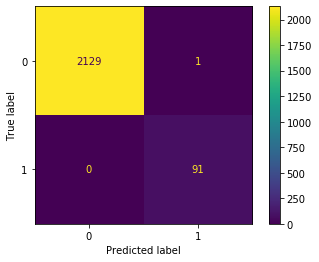

In [102]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

display(confusion_matrix(y_test, gbc_pred))

plot_confusion_matrix(gbc, X_test, y_test)

## 5. Evaluation Metrics

### Decision Tree Classifier Evaluation

In [104]:
print(classification_report(y_test, dtr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2130
           1       0.99      0.99      0.99        91

    accuracy                           1.00      2221
   macro avg       0.99      0.99      0.99      2221
weighted avg       1.00      1.00      1.00      2221



In [106]:
dtrprob1 = dtr_proba[:,1]
fpr_dtr1, tpr_dtr1, threshold_dtr1 = roc_curve(y_test, dtrprob1)
auc_dtr = auc(fpr_dtr1, tpr_dtr1)

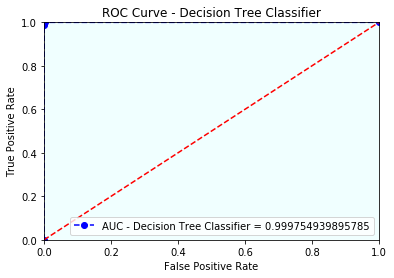

In [136]:
plt.title('ROC Curve - Decision Tree Classifier')
plt.plot(fpr_dtr1, tpr_dtr1, 'b--o', label='AUC - Decision Tree Classifier = {}'.format(auc_dtr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtr1, tpr_dtr1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [108]:
thres_dtr = pd.DataFrame({'thres': threshold_dtr1, 'tpr': tpr_dtr1, 'fpr': fpr_dtr1})
thres_dtr

,thres,tpr,fpr
0,2.000000,0.000000,0.000000
1,1.000000,0.989011,0.000469
2,0.142857,1.000000,0.001878
3,0.000000,1.000000,1.000000


In [116]:
dtr_pred_roc = [0 if x < 1 else 1 for x in dtrprob1]
confusion_matrix(y_test, dtr_pred_roc)

array([[2129,    1],
       [   1,   90]], dtype=int64)

In [111]:
confusion_matrix(y_test, dtr_pred)

array([[2129,    1],
       [   1,   90]], dtype=int64)

### Random Forest Classifier Evaluation

In [117]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2130
           1       0.99      0.99      0.99        91

    accuracy                           1.00      2221
   macro avg       0.99      0.99      0.99      2221
weighted avg       1.00      1.00      1.00      2221



In [118]:
rfcprob1 = rfc_proba[:,1]
fpr_rfc1, tpr_rfc1, threshold_rfc1 = roc_curve(y_test, rfcprob1)
auc_rfc = auc(fpr_rfc1, tpr_rfc1)

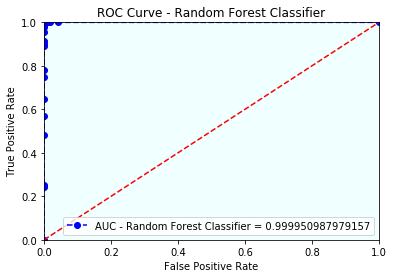

In [137]:
plt.title('ROC Curve - Random Forest Classifier')
plt.plot(fpr_rfc1, tpr_rfc1, 'b--o', label='AUC - Random Forest Classifier = {}'.format(auc_rfc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc1, tpr_rfc1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [120]:
thres_rfc = pd.DataFrame({'thres': threshold_rfc1, 'tpr': tpr_rfc1, 'fpr': fpr_rfc1})
thres_rfc

,thres,tpr,fpr
0,2.00,0.000000,0.000000
1,1.00,0.241758,0.000000
2,0.99,0.252747,0.000000
3,0.98,0.483516,0.000000
4,0.96,0.571429,0.000000
5,0.94,0.648352,0.000000
6,0.92,0.747253,0.000000
7,0.90,0.780220,0.000000
8,0.86,0.890110,0.000000
9,0.84,0.901099,0.000000


In [124]:
rfc_pred_roc = [0 if x < 0.45 else 1 for x in rfcprob1]
confusion_matrix(y_test, rfc_pred_roc)

array([[2129,    1],
       [   1,   90]], dtype=int64)

In [123]:
confusion_matrix(y_test, rfc_pred)

array([[2129,    1],
       [   1,   90]], dtype=int64)

### Gradient Boosting Classifier Evaluation

In [125]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2130
           1       0.99      1.00      0.99        91

    accuracy                           1.00      2221
   macro avg       0.99      1.00      1.00      2221
weighted avg       1.00      1.00      1.00      2221



In [126]:
gbcprob1 = gbc_proba[:,1]
fpr_gbc1, tpr_gbc1, threshold_gbc1 = roc_curve(y_test, gbcprob1)
auc_gbc = auc(fpr_gbc1, tpr_gbc1)

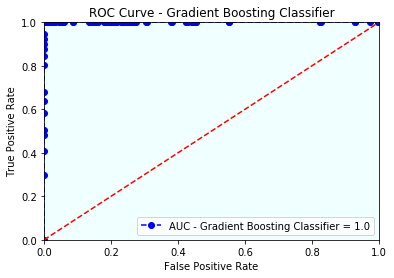

In [138]:
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.plot(fpr_gbc1, tpr_gbc1, 'b--o', label='AUC - Gradient Boosting Classifier = {}'.format(auc_gbc))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # limit sumbu x
plt.ylim([0,1]) # limit sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc1, tpr_gbc1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [128]:
thres_gbc = pd.DataFrame({'thres': threshold_gbc1, 'tpr': tpr_gbc1, 'fpr': fpr_gbc1})
thres_gbc

,thres,tpr,fpr
0,1.999702,0.000000,0.000000
1,0.999702,0.296703,0.000000
2,0.999666,0.406593,0.000000
3,0.999512,0.483516,0.000000
4,0.999479,0.505495,0.000000
...,...,...,...
113,0.000002,1.000000,0.973709
114,0.000002,1.000000,0.997183
115,0.000002,1.000000,0.998122
116,0.000002,1.000000,0.999061


In [130]:
gbc_pred_roc = [0 if x < 0.45 else 1 for x in gbcprob1]
confusion_matrix(y_test, gbc_pred_roc)

array([[2129,    1],
       [   0,   91]], dtype=int64)

In [131]:
confusion_matrix(y_test, gbc_pred)

array([[2129,    1],
       [   0,   91]], dtype=int64)

In [140]:
# Membandingkan model
ml_model_a = pd.DataFrame({
    "Decision Tree Classifier": [accuracy_score(y_test, dtr_pred_roc), precision_score(y_test, dtr_pred_roc, pos_label=0), recall_score(y_test, dtr_pred_roc), f1_score(y_test, dtr_pred_roc), roc_auc_score(y_test, dtr_pred_roc), list(confusion_matrix(y_test, dtr_pred_roc).ravel())],
    "Random Forest Classifier": [accuracy_score(y_test, rfc_pred_roc), precision_score(y_test, rfc_pred_roc, pos_label=0), recall_score(y_test, rfc_pred_roc), f1_score(y_test, rfc_pred_roc), roc_auc_score(y_test, rfc_pred_roc), list(confusion_matrix(y_test, rfc_pred_roc).ravel())],
    "Gradient Boosting Classifier": [accuracy_score(y_test, gbc_pred_roc), precision_score(y_test, gbc_pred_roc, pos_label=0), recall_score(y_test, gbc_pred_roc), f1_score(y_test, gbc_pred_roc), roc_auc_score(y_test, gbc_pred_roc), list(confusion_matrix(y_test, gbc_pred_roc).ravel())]
}, index = ['accuracy_score', 'precision_score(-)', 'recall_score(+)', 'f1_score',  'roc_auc_score', 'conf_matrix (TN, FP, FN, TP)']).T
ml_model_a

,accuracy_score,precision_score(-),recall_score(+),f1_score,roc_auc_score,"conf_matrix (TN, FP, FN, TP)"
Decision Tree Classifier,0.9991,0.999531,0.989011,0.989011,0.994271,"[2129, 1, 1, 90]"
Random Forest Classifier,0.9991,0.999531,0.989011,0.989011,0.994271,"[2129, 1, 1, 90]"
Gradient Boosting Classifier,0.99955,1,1,0.994536,0.999765,"[2129, 1, 0, 91]"


- model yang memiliki hasil evaluation metrics terbaik, untuk melakukan prediksi pada testing dataset, adalah **Gradient Boosting Classifier**
- fokus evaluasi pada Machine Learning ini adalah pada **FN**, karena jika machine learning memprediksi seorang pemain 'tidak berpotensi' tapi kenyataannya pemain tersebut 'berpotensi' dan club tersebut tidak merekrut pemain tersebut, maka club tersebut telah kehilangan pemain bagus dan dapat menyebabkan tidak tercapainya target club.

- Jika machine learningnya memprediksi seorang pemain berpotensi, namun kenyataannya pemain tersebut tidak berpotensi dan club tersebut merekrutnya, club tersebut mungkin harus akan lebih ekstra melatih pemain tersebut. Namun disisi pencapaian target kejuaraan akan lebih aman.

## 6. Meningkatkan performa pada tiap model

### Oversampling

In [142]:
ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_ros.value_counts())
display(y_test.value_counts())

0    8520
1     363
Name: potential_player, dtype: int64

1    8520
0    8520
Name: potential_player, dtype: int64

0    2130
1      91
Name: potential_player, dtype: int64

### SMOTE

In [145]:
smo = SMOTE(random_state=1)
X_smo, y_smo = smo.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_smo.value_counts())
display(y_test.value_counts())

0    8520
1     363
Name: potential_player, dtype: int64

1    8520
0    8520
Name: potential_player, dtype: int64

0    2130
1      91
Name: potential_player, dtype: int64

### Undersampling

In [149]:
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

display(y_train.value_counts())
display(y_rus.value_counts())
display(y_test.value_counts())

0    8520
1     363
Name: potential_player, dtype: int64

1    363
0    363
Name: potential_player, dtype: int64

0    2130
1      91
Name: potential_player, dtype: int64

#### Decision Tree Classifier

array([[2128,    2],
       [   0,   91]], dtype=int64)

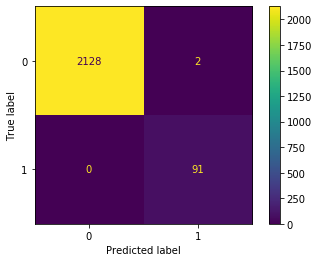

In [156]:
# Oversampling Decision Tree Classifier
dtr_ros = DecisionTreeClassifier(random_state=2)
dtr_ros.fit(X_ros, y_ros)

dtr_ros_pred = dtr_ros.predict(X_test)
dtr_ros_proba = dtr_ros.predict_proba(X_test)

display(confusion_matrix(y_test, dtr_ros_pred))

plot_confusion_matrix(dtr_ros, X_test, y_test)

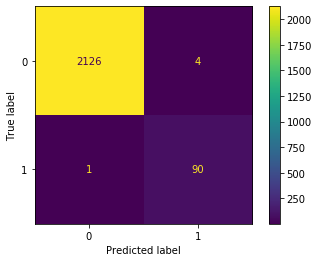

In [157]:
# SMOTE Decision Tree Classifier
dtr_smo = DecisionTreeClassifier(random_state=2)
dtr_smo.fit(X_smo, y_smo)

dtr_smo_pred = dtr_smo.predict(X_test)
dtr_smo_proba = dtr_smo.predict_proba(X_test)

confusion_matrix(y_test, dtr_smo_pred)

plot_confusion_matrix(dtr_smo, X_test, y_test)

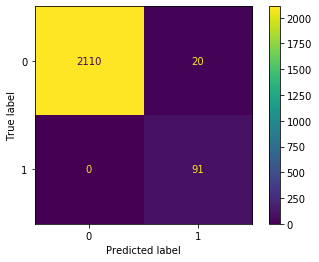

In [158]:
# Undersampling Decision Tree Classifier
dtr_rus = DecisionTreeClassifier(random_state=10)
dtr_rus.fit(X_rus, y_rus)

dtr_rus_pred = dtr_rus.predict(X_test)
dtr_rus_proba = dtr_rus.predict_proba(X_test)

confusion_matrix(y_test, dtr_rus_pred)

plot_confusion_matrix(dtr_rus, X_test, y_test)

#### Random Forest Classifier

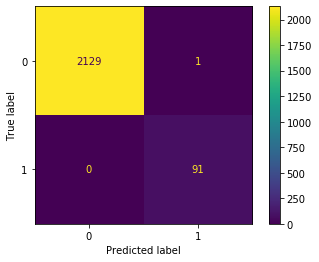

In [159]:
# Oversampling Random Forest Classifier
rfc_ros = RandomForestClassifier(random_state=3)
rfc_ros.fit(X_ros, y_ros)

rfc_ros_pred = rfc_ros.predict(X_test)
rfc_ros_proba = rfc_ros.predict_proba(X_test)

confusion_matrix(y_test, rfc_ros_pred)

plot_confusion_matrix(rfc_ros, X_test, y_test)

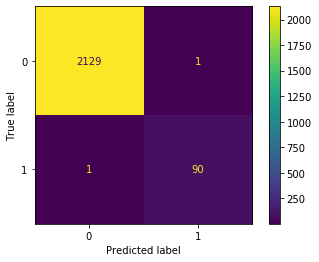

In [160]:
# SMOTE Random Forest Classifier
rfc_smo = RandomForestClassifier(random_state=1)
rfc_smo.fit(X_smo, y_smo)

rfc_smo_pred = rfc_smo.predict(X_test)
rfc_smo_proba = rfc_smo.predict_proba(X_test)

confusion_matrix(y_test, rfc_smo_pred)

plot_confusion_matrix(rfc_smo, X_test, y_test)

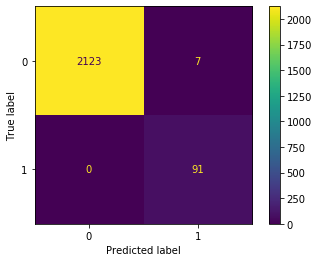

In [161]:
# Undersampling Random Forest Classifier
rfc_rus = RandomForestClassifier(random_state=3)
rfc_rus.fit(X_rus, y_rus)

rfc_rus_pred = rfc_rus.predict(X_test)
rfc_rus_proba = rfc_rus.predict_proba(X_test)

confusion_matrix(y_test, rfc_rus_pred)

plot_confusion_matrix(rfc_rus, X_test, y_test)

#### Gradient Boosting Classifier

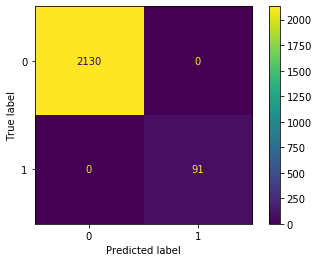

In [162]:
# Oversampling Gradient Boosting Classifier
gbc_ros = GradientBoostingClassifier(random_state=1)
gbc_ros.fit(X_ros, y_ros)

gbc_ros_pred = gbc_ros.predict(X_test)
gbc_ros_proba = gbc_ros.predict_proba(X_test)

confusion_matrix(y_test, gbc_ros_pred)

plot_confusion_matrix(gbc_ros, X_test, y_test)

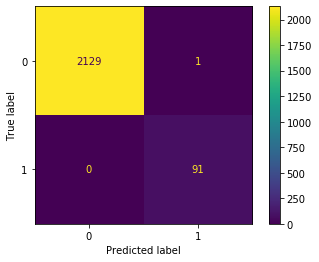

In [163]:
# SMOTE Gradient Boosting Classifier
gbc_smo = GradientBoostingClassifier(random_state=1)
gbc_smo.fit(X_smo, y_smo)

gbc_smo_pred = gbc_smo.predict(X_test)
gbc_smo_proba = gbc_smo.predict_proba(X_test)

confusion_matrix(y_test, gbc_smo_pred)

plot_confusion_matrix(gbc_smo, X_test, y_test)

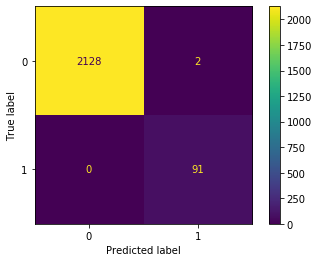

In [164]:
# Undersampling Gradient Boosting Classifier
gbc_rus = GradientBoostingClassifier(random_state=1)
gbc_rus.fit(X_rus, y_rus)

gbc_rus_pred = gbc_rus.predict(X_test)
gbc_rus_proba = gbc_rus.predict_proba(X_test)

confusion_matrix(y_test, gbc_rus_pred)

plot_confusion_matrix(gbc_rus, X_test, y_test)

- Oversampling Gradient Boosting Classifier menghasilkan model machine learning yang sempurna, yaitu **gbc_ros**

In [195]:
# Membandingkan model
ml_model_fix = pd.DataFrame({
    "Gradient Boosting Classifier": [accuracy_score(y_test, gbc_ros_pred), precision_score(y_test, gbc_ros_pred, pos_label=0), recall_score(y_test, gbc_ros_pred), f1_score(y_test, gbc_ros_pred), roc_auc_score(y_test, gbc_ros_pred), list(confusion_matrix(y_test, gbc_ros_pred).ravel())]
}, index = ['accuracy_score', 'precision_score(-)', 'recall_score(+)', 'f1_score',  'roc_auc_score', 'conf_matrix (TN, FP, FN, TP)']).T
ml_model_fix

,accuracy_score,precision_score(-),recall_score(+),f1_score,roc_auc_score,"conf_matrix (TN, FP, FN, TP)"
Gradient Boosting Classifier,1,1,1,1,1,"[2130, 0, 0, 91]"


## 7. Mengklasifikasi pemain pada dataset new_players

In [165]:
df_new_players = pd.read_csv('new_players.csv')
df_new_players

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [174]:
X.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [175]:
df_stdscaled.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.078114,-0.291659,-0.066275,0.118245,-0.410587,5.021372,0.725037,1.501031,2.970828,2.868271,-1.616981,-0.293934,-0.190875
1,0.206157,1.643881,1.376508,-1.477668,-0.983173,-0.826262,-0.839898,1.188612,0.510115,0.146893,-0.201991,-0.789072,-0.875473
2,2.780098,0.537858,-0.426970,-1.717055,-1.235785,-1.026524,-0.784008,0.004711,1.125293,-0.628383,-1.560381,-1.334734,0.177755
3,-0.729821,0.261352,0.005864,0.477326,-0.747402,-0.505844,-0.672227,-0.537911,0.099996,0.115249,-0.352923,-1.102322,-0.570037
4,1.610125,0.537858,0.655116,-0.998894,-0.966332,-0.465792,-0.895789,-0.743450,1.216430,0.589908,-1.107584,1.039906,-0.959731


In [179]:
col = X.columns.tolist()
X_new = df_new_players[col]
X_new

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28.0,200.66,103.418976,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,28.0,200.66,107.047712,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,23.0,208.28,103.418976,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,24.0,213.36,108.862080,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [182]:
# karena X dilatih pakai data skala, maka di uji cobanya juga harus pakai skala.
stdscaler.fit(X_new)
scaled_features_new = stdscaler.transform(X_new)
scaled_features_new

df_stdscaled_new = pd.DataFrame(scaled_features_new, columns=X.columns)
df_stdscaled_new

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.342023,0.499014,0.250921,0.664993,-0.895364,0.247934,-0.617326,-0.186725,0.684281,1.609449,-1.425465,-0.172796,-0.614537
1,1.391912,-4.394712,-2.945117,0.307769,-0.446118,-0.589963,2.243481,-0.458498,-0.821288,-1.175420,-1.137166,-0.143601,2.374878
2,-0.033254,-0.860354,-0.467290,-0.684522,1.733558,0.834461,2.121745,0.730509,-0.868337,0.191387,1.726603,0.119155,1.353041
3,-1.458420,-0.588480,-0.108185,-0.446372,-0.978558,-0.967016,-0.373853,-0.101796,-0.586043,-0.474931,-0.329929,-1.038917,0.526876
4,-0.983365,1.586509,1.687342,-1.081438,-0.845448,-0.087225,-0.860798,-0.407541,0.331414,1.336088,-1.463905,0.430569,-0.962396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.204274,-0.044733,0.179099,1.101601,2.232720,3.431940,0.052225,0.857903,0.731330,1.626534,0.650287,0.819837,-0.625407
496,0.204274,-0.044733,0.466384,0.982526,0.735233,0.331723,-0.069512,-0.161246,-0.021454,-0.321165,0.861706,-0.163064,-0.288419
497,-0.983365,0.770888,0.179099,-0.287605,-0.612505,-0.422384,-0.739062,0.271892,0.754855,0.328068,-0.272270,0.284594,-0.581925
498,-0.745837,1.314636,0.610026,0.625302,-0.379563,0.122249,-0.921667,0.110527,1.037149,-0.047804,-0.810428,0.887959,-1.136325


In [192]:
gbc_ros_pred_new = gbc_ros.predict(df_stdscaled_new)
gbc_ros_proba_new = gbc_ros.predict_proba(df_stdscaled_new)

print(gbc_ros_pred_new)

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [193]:
df_new_players['potential_player_prediction'] = gbc_ros_pred_new
df_new_players

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player_prediction
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


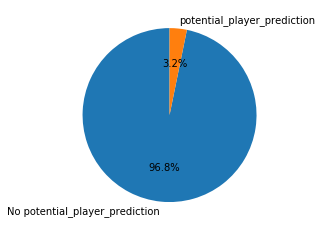

[484, 16]

In [194]:
sizes = [len(df_new_players[df_new_players['potential_player_prediction']==False]), len(df_new_players[df_new_players['potential_player_prediction']==True])]
labels = ['No potential_player_prediction', 'potential_player_prediction']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()
display(sizes)